In [23]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input,Conv2D,Dropout, MaxPooling2D,Dense,Activation,BatchNormalization, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip=True, 
                                    rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,)
test_datagen = ImageDataGenerator (rescale= 1./255)

In [3]:
x_train = train_datagen.flow_from_directory("C:/Users/User/VSCode/python/Data_Science/eye_gaze/eye-detection/train",target_size = (128,128),batch_size = 256,class_mode = "categorical")
x_test = test_datagen.flow_from_directory("C:/Users/User/VSCode/python/Data_Science/eye_gaze/eye-detection/test",target_size = (128,128),batch_size = 256,class_mode = "categorical")

Found 8749 images belonging to 2 classes.
Found 2018 images belonging to 2 classes.


In [4]:
x_train.class_indices

{'closed': 0, 'open': 1}

In [5]:
def block(p_bname,p_filters,p_conv,p_drop_rate,p_is_bn):
  for i in range(p_conv):
    model.add(Conv2D(filters=p_filters,kernel_size=(3,3),activation='relu',padding='same',name=p_bname+'_conv'+str(i)))
    if p_is_bn:model.add(BatchNormalization(name=p_bname+'_Bn'+str(i)))
  model.add(MaxPooling2D(pool_size=(2, 2),name=p_bname+'_pool'))
  if p_is_bn:model.add(BatchNormalization(name=p_bname+'_Bn_pool'))
  if p_drop_rate>0: model.add(Dropout(drop_rate,name=p_bname+'_Dr'))  

In [6]:
drop_rate=0
model = Sequential()
model.add(Input(shape=(128,128,3)))
block(p_bname='B1',p_filters=32,p_conv=6,
    p_drop_rate=drop_rate,p_is_bn=True)
block(p_bname='B2',p_filters=64,p_conv=6,
    p_drop_rate=drop_rate,p_is_bn=True)
block(p_bname='B3',p_filters=128,p_conv=6,
    p_drop_rate=drop_rate,p_is_bn=True)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy" , metrics=["accuracy"])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

In [8]:
model.fit(x_train, epochs=40, validation_data= x_test, validation_steps=20)

Epoch 1/40
35/35 [==============================] - 116s 3s/step - loss: 0.9636 - accuracy: 0.7941 - val_loss: 0.7016 - val_accuracy: 0.5426
Epoch 2/40
35/35 [==============================] - 54s 2s/step - loss: 0.2212 - accuracy: 0.9089
Epoch 3/40
35/35 [==============================] - 53s 2s/step - loss: 0.1257 - accuracy: 0.9517
Epoch 4/40
35/35 [==============================] - 54s 2s/step - loss: 0.0914 - accuracy: 0.9659
Epoch 5/40
35/35 [==============================] - 54s 2s/step - loss: 0.0790 - accuracy: 0.9719
Epoch 6/40
35/35 [==============================] - 53s 2s/step - loss: 0.0856 - accuracy: 0.9674
Epoch 7/40
35/35 [==============================] - 54s 2s/step - loss: 0.0596 - accuracy: 0.9802
Epoch 8/40
35/35 [==============================] - 54s 2s/step - loss: 0.0417 - accuracy: 0.9849
Epoch 9/40
35/35 [==============================] - 53s 2s/step - loss: 0.0453 - accuracy: 0.9842
Epoch 10/40
35/35 [==============================] - 54s 2s/step - loss: 0.

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
B1_conv0 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
B1_Bn0 (BatchNormalization)  (None, 128, 128, 32)      128       
_________________________________________________________________
B1_conv1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
B1_Bn1 (BatchNormalization)  (None, 128, 128, 32)      128       
_________________________________________________________________
B1_conv2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
B1_Bn2 (BatchNormalization)  (None, 128, 128, 32)      128       
_________________________________________________________________
B1_conv3 (Conv2D)            (None, 128, 128, 32)      9

In [10]:
model.save("eye_detection.h5")

In [41]:
model= load_model("eye_detection.h5")

In [47]:
test_loss, test_accuracy = model.evaluate(x_test)

8/8 [==============================] - 4s 534ms/step - loss: 0.1161 - accuracy: 0.9495


In [49]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.11614565551280975
Test Accuracy: 0.9494549036026001


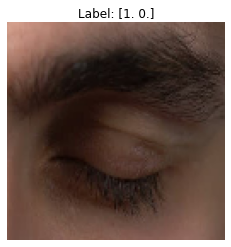

In [58]:
batch = x_test.next()
test_image = batch[0][0]  # Extract the first image from the batch
label = batch[1][0]  # Extract the label for the first image
plt.imshow(test_image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide the axis
plt.show()

In [55]:
predictions = model.predict(x_test)

0.0

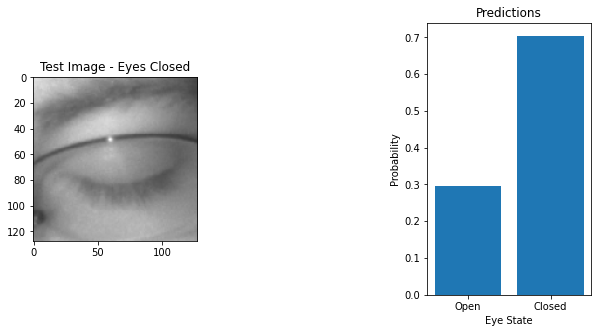

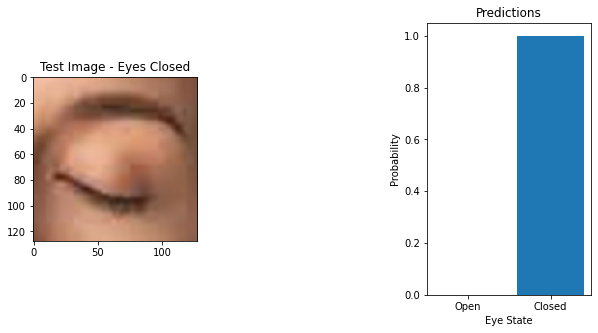

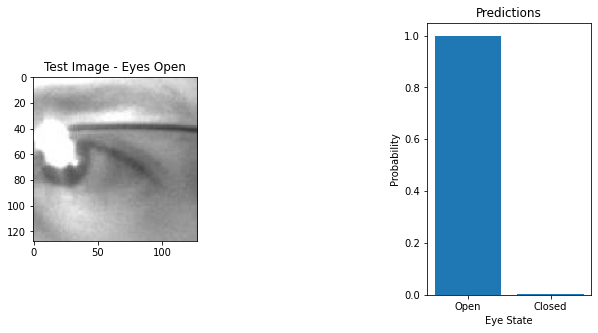

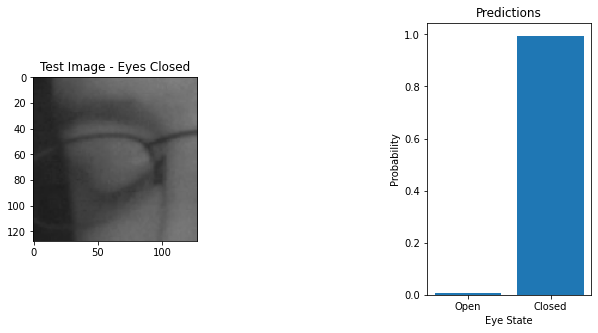

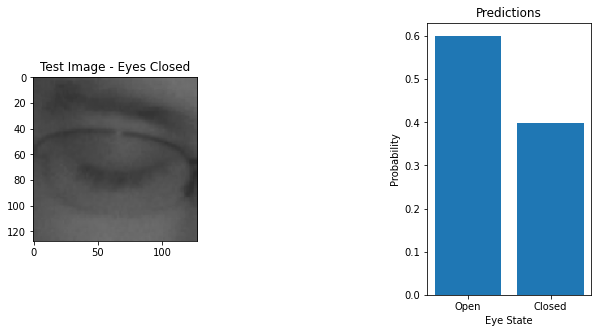

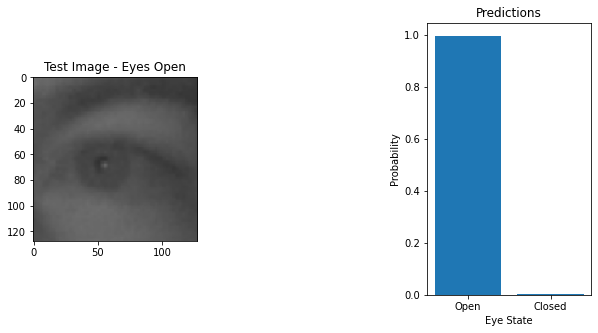

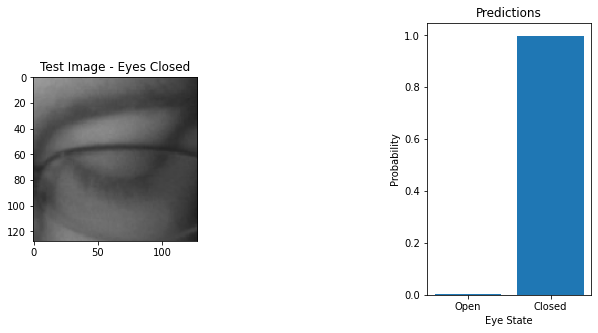

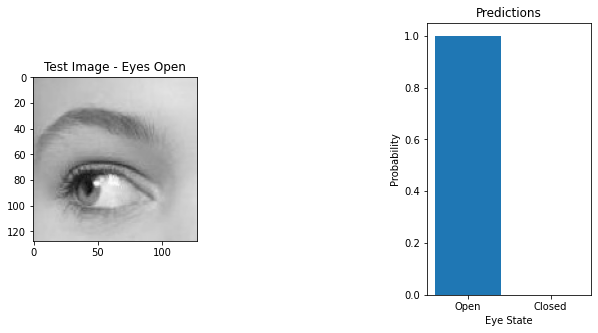

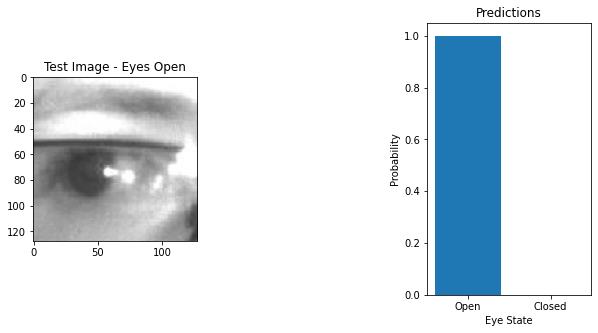

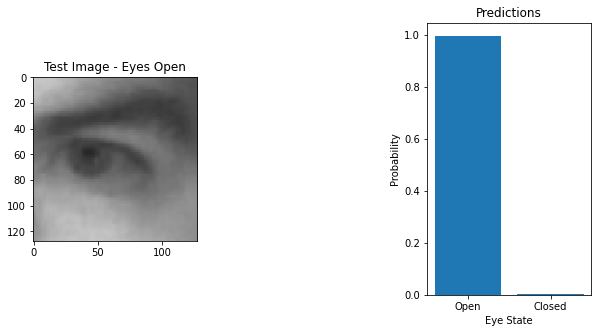

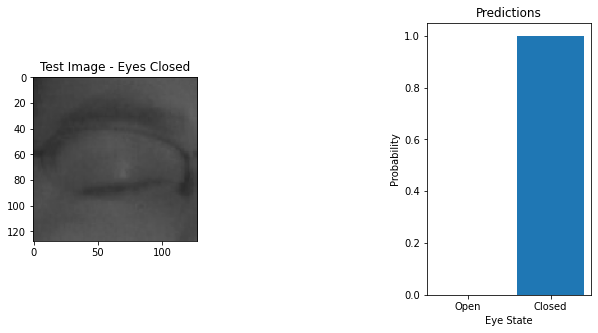

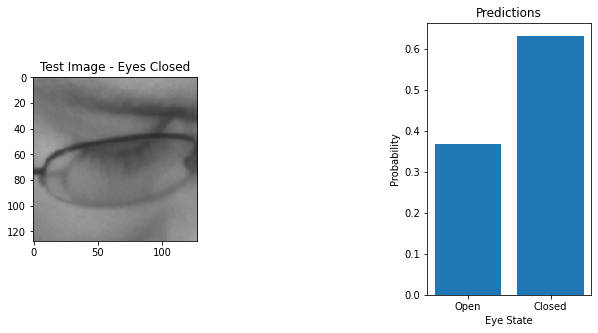

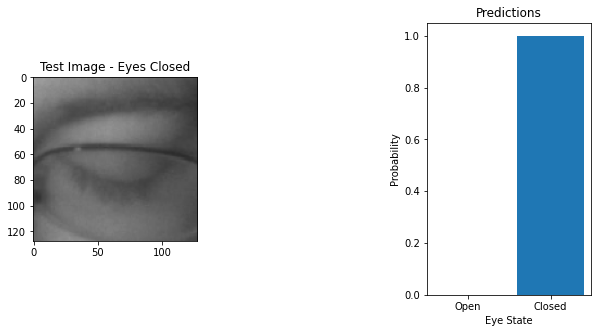

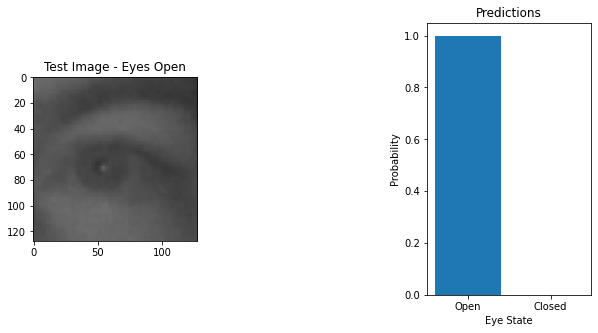

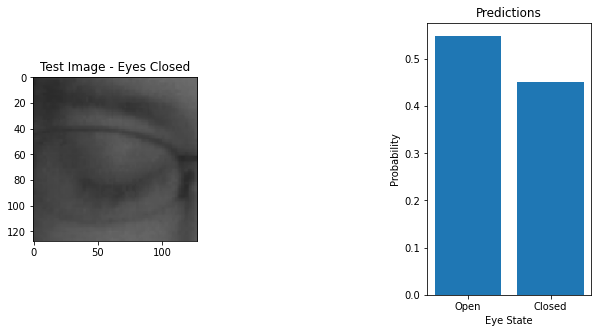

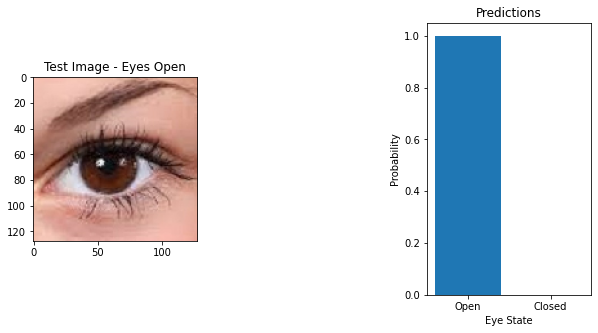

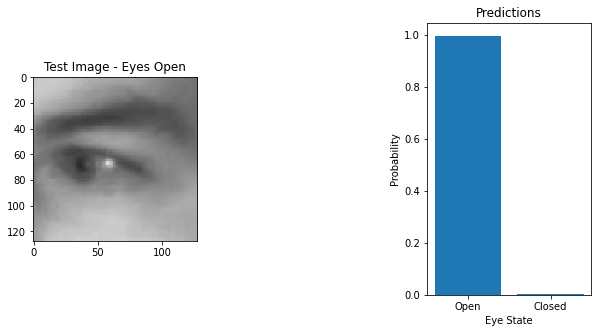

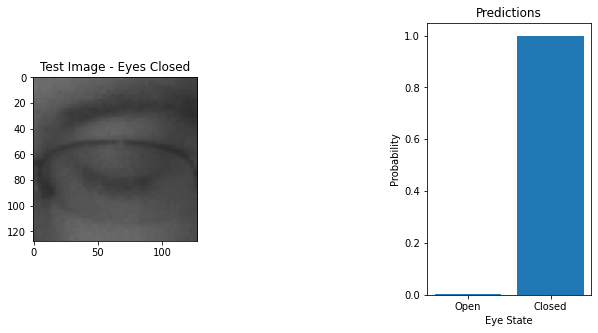

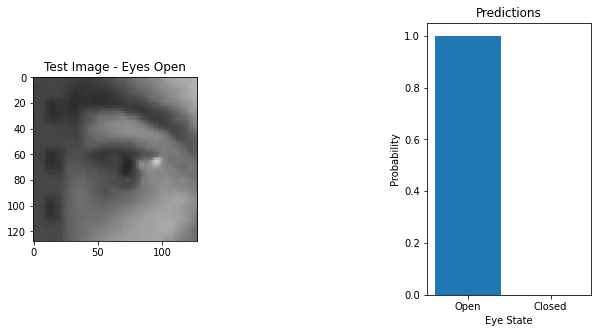

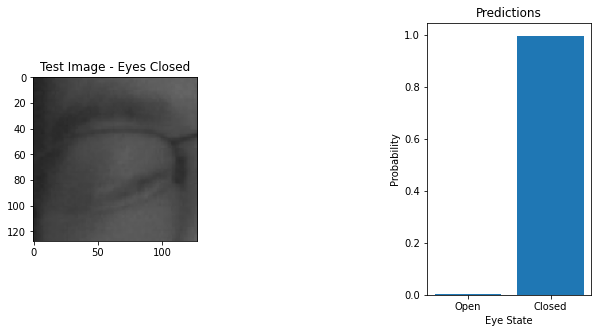

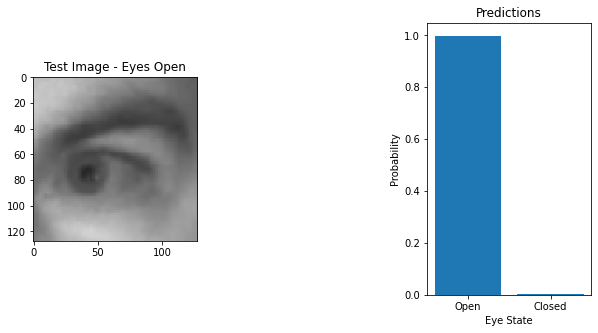

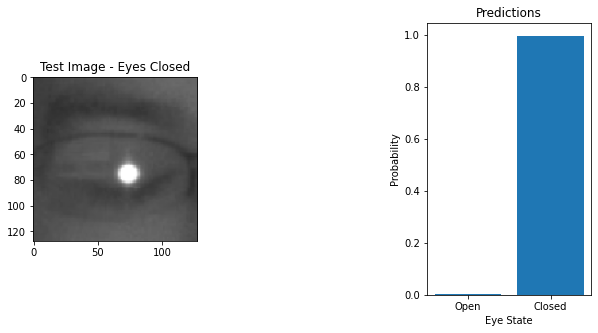

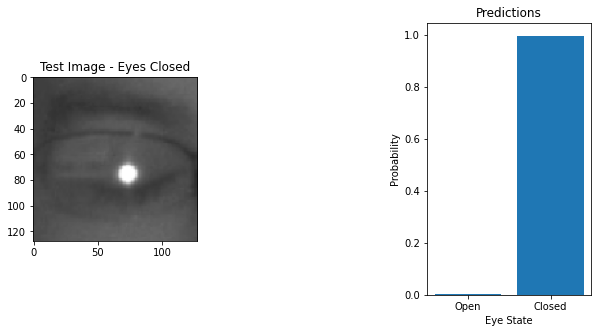

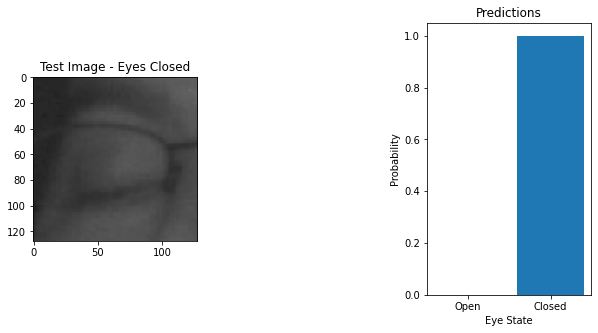

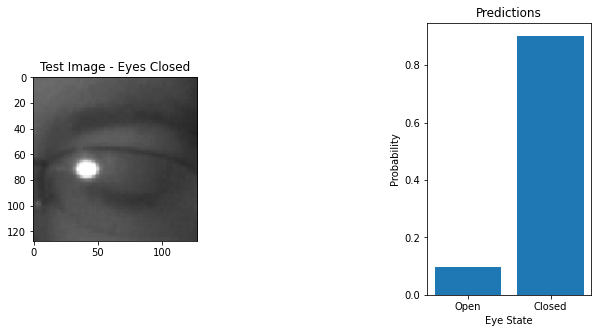

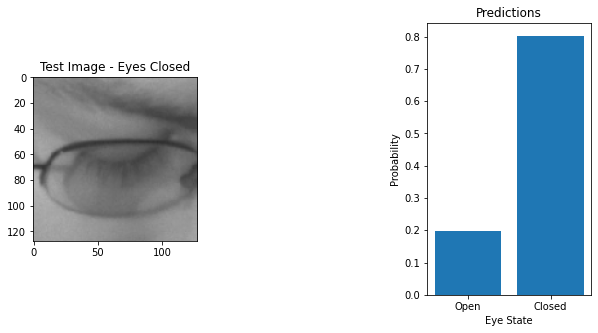

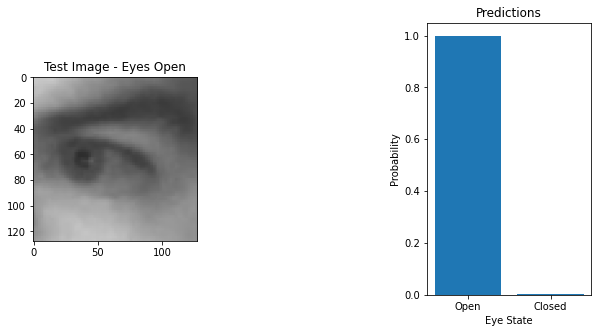

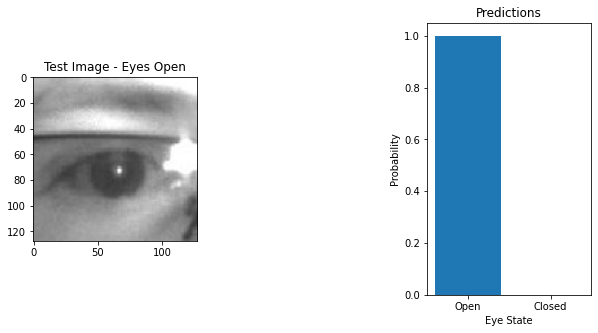

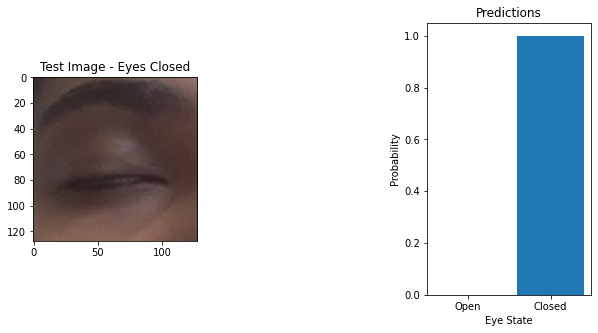

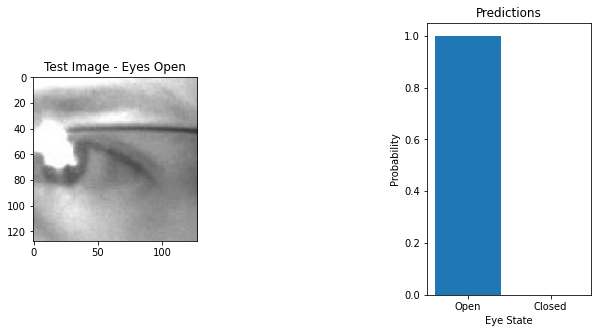

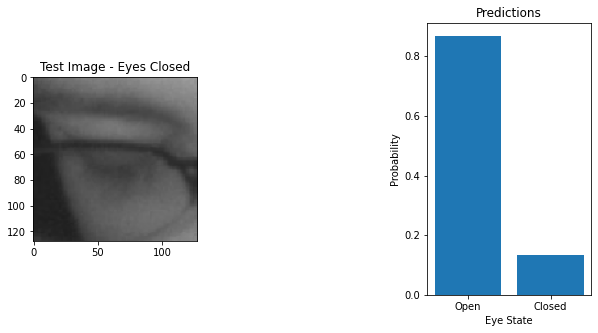

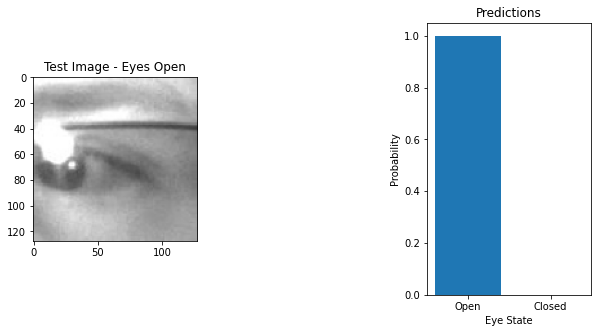

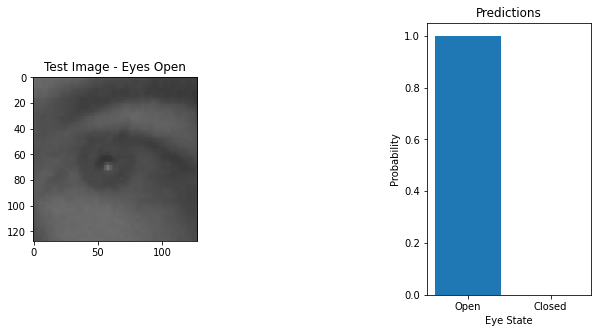

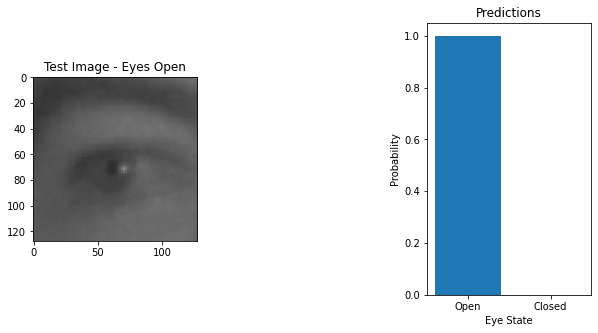

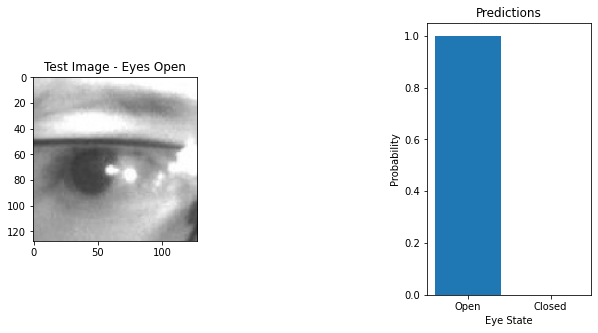

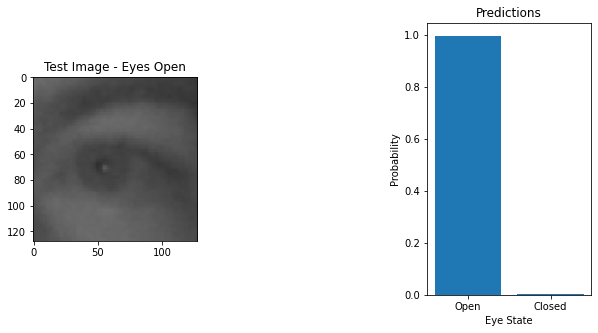

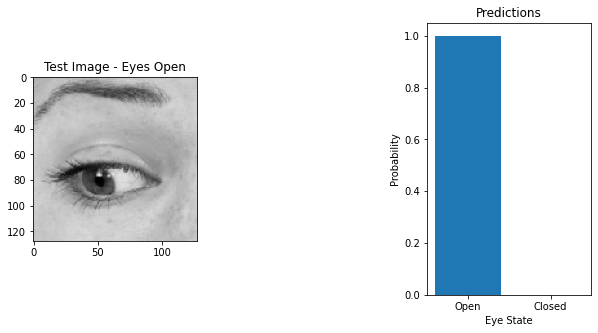

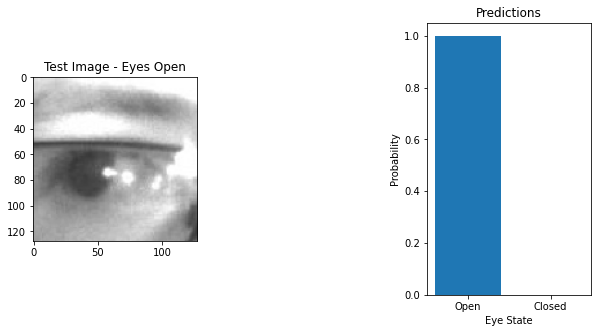

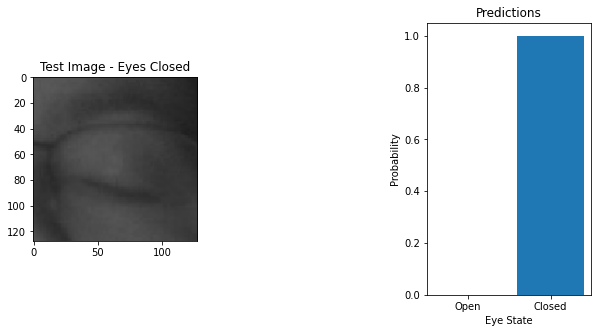

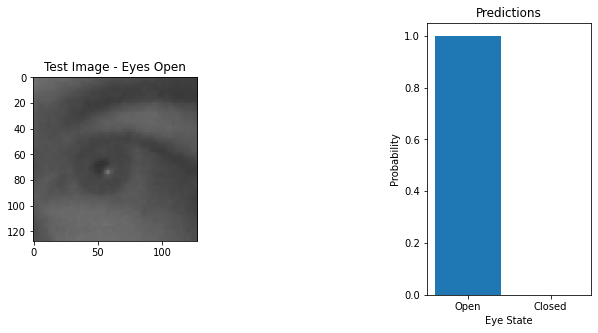

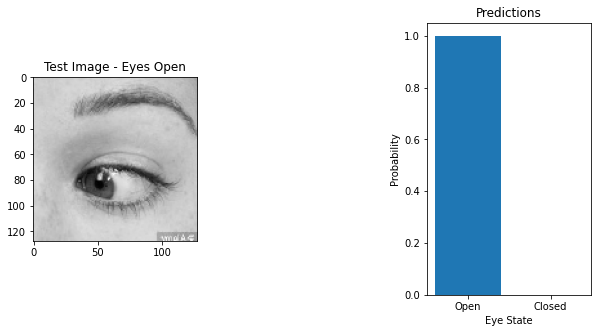

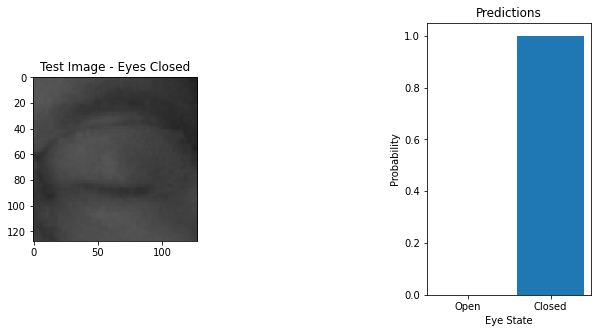

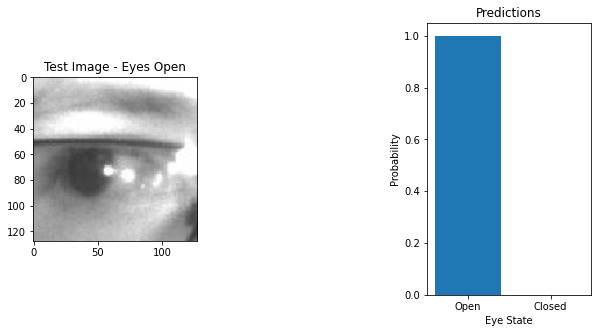

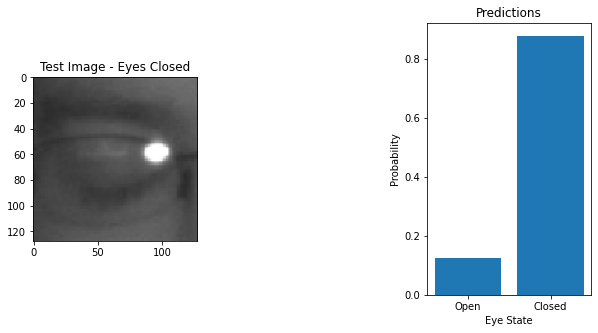

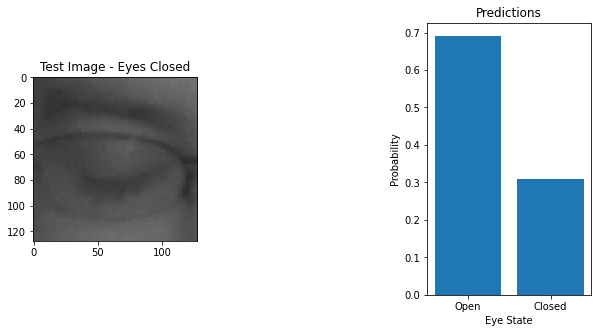

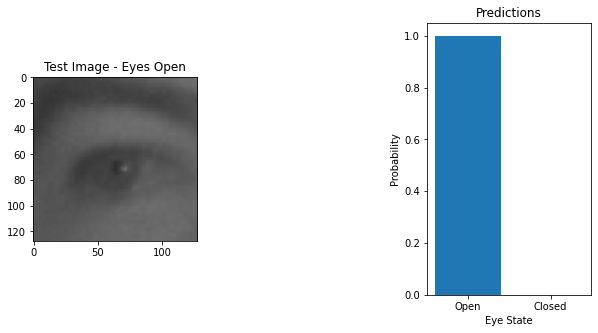

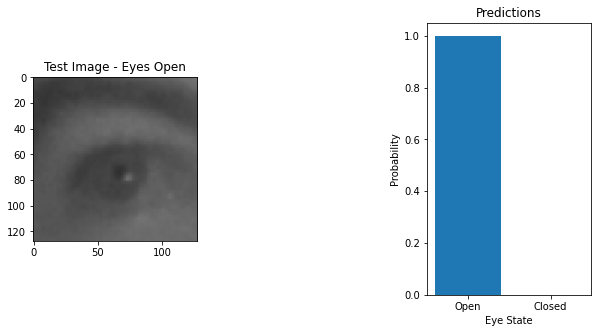

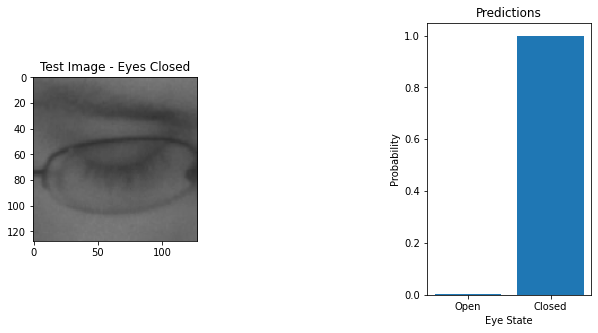

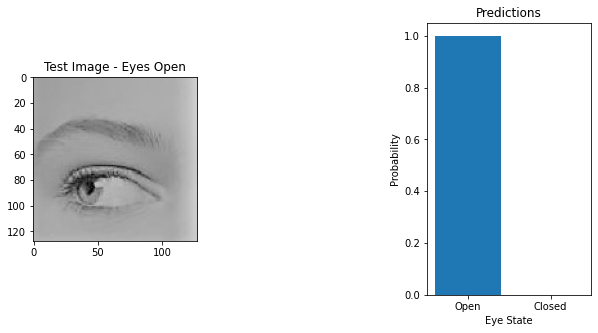

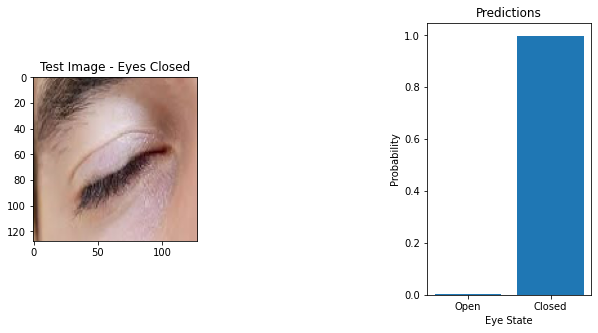

In [97]:
# Set the number of images you want to display
num_images_to_show = 50

# Retrieve a batch of test data (assuming x_test is a generator)
test_batch = x_test.next()
test_images = test_batch[0][:num_images_to_show]
true_labels = test_batch[1][:num_images_to_show]

# Make predictions on the selected test images
predictions = model.predict(test_images)

# Iterate over the selected images and display them
for i in range(num_images_to_show):
    prediction_string = ""
    if true_labels[i][0] == 0.0:
        prediction_string = "Eyes Open"
    elif true_labels[i][0] == 1.0:
        prediction_string = "Eyes Closed"
    else:
        prediction_string = "Unknown"
    
    # Convert model predictions to "open" or "closed"
    prediction_label = "Open" if predictions[i][0] < 0.5 else "Closed"
    
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i])
    plt.title(f"Test Image - {prediction_string}")
    
    # Display the model's predictions
    plt.subplot(1, 3, 3)
    plt.bar(["Open", "Closed"], [1 - predictions[i][0], predictions[i][0]])
    plt.title("Predictions")
    plt.xlabel("Eye State")
    plt.ylabel("Probability")
    
    plt.show()

### After looking at the images a majority of the images where the model hasnt confidentally identified the eye is when the image has glasses and especially when with glares from light